In [1]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn
import numpy as np

## Loading Data File

In [2]:
kc_house = pd.read_csv(r"C:/Users/aksha/OneDrive/Desktop/Data Science Material/ML + Python Notes/Data/kc_house_data.csv")

In [3]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Using only 1 predictor to make it easier to visualize on a plot

In [42]:
X = kc_house['sqft_living']
y = kc_house['price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

## Class to get the models created during bagging

In [44]:
class BaggedRegression:
    def __init__(self, n_estimators = 10, random_state = None):
#         self.base_estimator = base_estimator
        self.n_estimators = n_estimators
#         self.dict_for_not_selected = dict()
        self.samples = list()
        self.model_list = list()
        self.prediction_df = None
        self.random_state = random_state

    # Create bootstrap sample
    def __create_boot_samples(self, X_train):
        
        if self.random_state is not None:
            self.random_state = range(self.random_state, self.random_state + self.n_estimators)
        # Loop to get the number of samples defined by the user.
        for i in range(self.n_estimators):
            if self.random_state is None:
                boot_sample = X_train.sample(frac=1, replace=True)
            else:
                boot_sample = X_train.sample(frac=1, replace=True, random_state = self.random_state[i])

            self.samples.append(boot_sample.index.tolist())
#             index_selected = np.unique(boot_sample.index.tolist())
#             not_selected_list = list()

#             # Condition to mark the index True if that index is selected for the bootstrap sample.
#             for j in range(X_train.shape[0]):
#                 if j not in index_selected:
#                     not_selected_list.append(True)
#                 else:
#                     not_selected_list.append(False)

#             # Naming and adding the sample to a dictionary.
#             key = 'Boot' + str(i+1)
#             self.dict_for_not_selected[key] = not_selected_list
# #         return self.dict_for_not_selected, self.samples
    
    # Build model
    def __build_models(self, X_train, y_train):
        
        # Looping till every sample is used.
        for i in range(len(self.samples)):
            train_predictor = X_train.loc[self.samples[i],]
            train_response = y_train.loc[self.samples[i],]

            # Fitting decision tree using bootstrapped samples.
#             model = self.base_estimator
            model = LinearRegression()
            model.fit(train_predictor, train_response)
            self.model_list.append(model)
#         return self.model_list
    
    # Building model
    def bagging_build(self, X_train, y_train):
        X_train = X_train.reset_index()
        y_train = y_train.reset_index()
        X_train = X_train.drop('index', axis = 1)
        y_train = y_train.drop('index', axis = 1)
        self.__create_boot_samples(X_train)
        self.__build_models(X_train, y_train)
#         return self.model_list
    
    # Predict
    def bagging_predict(self, X_test):
        prediction_list = dict()
        for i in range(len(self.model_list)):
            predictions = self.model_list[i].predict(X_test)
            model_name = 'model_'+str(i+1)
            prediction_list[model_name] = list(predictions)
        self.prediction_df = pd.DataFrame(prediction_list)

        final_prediction = list()
        for i in range(self.prediction_df.shape[0]):
#             count_dictionary = dict()
#             for j in range(prediction_df.shape[1]):
#                 pred = prediction_df.iloc[i,j]
#                 count_dictionary[pred] = count_dictionary.get(pred, 0) + 1
            final_prediction.append(np.mean(self.prediction_df.iloc[i, :]))
        return final_prediction

In [45]:
bagged_regressor = BaggedRegression(n_estimators=50, random_state=0)

In [46]:
bagged_regressor.bagging_build(X_train, y_train)

In [47]:
X_train = np.array(X_train).reshape((-1,1))
X_test = np.array(X_test).reshape((-1,1))
y_train = np.array(y_train).reshape((-1,1))
y_test = np.array(y_test).reshape((-1,1))

In [48]:
bagged_predictions = bagged_regressor.bagging_predict(X_test)

In [49]:
coef1 = list()
# coef2 = list()
# coef3 = list()
intercept = list()
for i in range(len(bagged_regressor.model_list)):
    coef1.append(bagged_regressor.model_list[i].coef_.tolist()[0][0])
#     coef2.append(x.model_list[i].coef_.tolist()[0][1])
#     coef3.append(x.model_list[i].coef_.tolist()[0][2])
    intercept.append(bagged_regressor.model_list[i].intercept_.tolist()[0])

In [50]:
print(np.mean(coef1))
# print(np.mean(coef2))
# print(np.mean(coef3))
print(np.mean(intercept))

278.35758155325516
-37766.48053284357


In [51]:
direct_model = LinearRegression().fit(X_train, y_train)

In [52]:
direct_predictions = direct_model.predict(X_test)

In [53]:
print(direct_model.coef_)
print(direct_model.intercept_)

[[279.73039149]]
[-40514.31944706]


In [54]:
from sklearn.metrics import mean_squared_error

## Checking how different bagged predictions are from direct predictions

In [55]:
print('RMSE: '+ str(mean_squared_error(direct_predictions, bagged_predictions) ** 0.5))

RMSE: 1276.7260585015397


In [56]:
print('MAPE: '+ str(np.mean(np.abs((direct_predictions - bagged_predictions) / direct_predictions)) * 100))

MAPE: 0.21133535772411174


In [57]:
import matplotlib.pyplot as plt

## Predictions from individual models created while bagging

In [58]:
points = dict()
for i in range(len(bagged_regressor.model_list)):
    proper_list = list()
    pred_list = bagged_regressor.model_list[i].predict(X_test).tolist()
    for j in pred_list:
        proper_list.append(j[0])
    points['model_'+str(i)] = proper_list

In [59]:
model_points = pd.DataFrame(points)

## Output using mean of coefficient and intercept of each model

In [60]:
def mean_equation(X_train):
    mean_pred = list()
    for i in X_train:
        calc_value = np.mean(intercept) + (np.mean(coef1) * float(i))
        mean_pred.append(calc_value)
    return mean_pred

In [61]:
mean_predictions = mean_equation(X_test)

In [62]:
model_points['Mean_Predictions'] = mean_predictions

In [63]:
model_points['Bagged_Predictions'] = bagged_predictions

In [64]:
model_points['Direct_Predictions'] = direct_predictions.tolist()

In [65]:
model_points['X'] = X_test.tolist()

In [66]:
model_points = model_points.sort_values('X')

In [67]:
model_points.shape

(6484, 54)

In [68]:
model_points = model_points.iloc[[0,1,2,3,4,6479,6480,6481,6482,6483],]

In [69]:
model_points.Direct_Predictions = model_points.Direct_Predictions.apply(lambda x: x[0])
model_points.X = model_points.X.apply(lambda x: x[0])
model_points.Bagged_Predictions = model_points.Bagged_Predictions.apply(lambda x: float(x))

## Mean_Predictions and Bagged_Predictions are exactly same! So our prediction after bagging would have been same if we had built a model with taking the mean of coeffs

In [70]:
model_points

,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,...,model_44,model_45,model_46,model_47,model_48,model_49,Mean_Predictions,Bagged_Predictions,Direct_Predictions,X
1782,7.826774e+04,6.605496e+04,7.050944e+04,6.588755e+04,5.399830e+04,7.161958e+04,3.890241e+04,7.924977e+04,7.097384e+04,5.852628e+04,...,6.224647e+04,7.518352e+04,7.527861e+04,6.260183e+04,6.542771e+04,8.230495e+04,6.800940e+04,6.800940e+04,6.578323e+04,380
2817,1.000564e+05,8.828534e+04,9.265289e+04,8.835080e+04,7.687552e+04,9.364470e+04,6.257485e+04,1.010076e+05,9.308043e+04,8.120290e+04,...,8.486910e+04,9.694964e+04,9.720898e+04,8.518448e+04,8.791113e+04,1.038361e+05,9.027801e+04,9.027801e+04,8.816166e+04,460
5659,1.027800e+05,9.106413e+04,9.542083e+04,9.115871e+04,7.973517e+04,9.639784e+04,6.553391e+04,1.037273e+05,9.584375e+04,8.403748e+04,...,8.769692e+04,9.967040e+04,9.995028e+04,8.800731e+04,9.072155e+04,1.065275e+05,9.306158e+04,9.306158e+04,9.095896e+04,470
2120,1.163979e+05,1.049581e+05,1.092605e+05,1.051982e+05,9.403344e+04,1.101635e+05,8.032918e+04,1.173260e+05,1.096604e+05,9.821036e+04,...,1.018361e+05,1.132742e+05,1.136568e+05,1.021215e+05,1.047737e+05,1.199845e+05,1.069795e+05,1.069795e+05,1.049455e+05,520
2073,1.163979e+05,1.049581e+05,1.092605e+05,1.051982e+05,9.403344e+04,1.101635e+05,8.032918e+04,1.173260e+05,1.096604e+05,9.821036e+04,...,1.018361e+05,1.132742e+05,1.136568e+05,1.021215e+05,1.047737e+05,1.199845e+05,1.069795e+05,1.069795e+05,1.049455e+05,520
4393,2.074656e+06,2.102913e+06,2.099403e+06,2.124083e+06,2.150124e+06,2.089672e+06,2.207890e+06,2.072813e+06,2.096490e+06,2.136272e+06,...,2.135044e+06,2.069504e+06,2.084649e+06,2.131737e+06,2.125471e+06,2.055097e+06,2.108370e+06,2.108370e+06,2.116207e+06,7710
2666,2.159087e+06,2.189056e+06,2.185209e+06,2.211128e+06,2.238773e+06,2.175019e+06,2.299620e+06,2.157124e+06,2.182153e+06,2.224144e+06,...,2.222707e+06,2.153848e+06,2.169629e+06,2.219245e+06,2.212594e+06,2.138530e+06,2.194661e+06,2.194661e+06,2.202923e+06,8020
4293,2.600308e+06,2.639221e+06,2.633614e+06,2.666008e+06,2.702037e+06,2.621028e+06,2.778987e+06,2.597721e+06,2.629811e+06,2.683345e+06,...,2.680815e+06,2.594611e+06,2.613720e+06,2.676543e+06,2.667884e+06,2.574536e+06,2.645601e+06,2.645601e+06,2.656087e+06,9640
4991,2.668398e+06,2.708691e+06,2.702812e+06,2.736206e+06,2.773528e+06,2.689856e+06,2.852964e+06,2.665714e+06,2.698894e+06,2.754210e+06,...,2.751511e+06,2.662631e+06,2.682252e+06,2.747114e+06,2.738144e+06,2.641821e+06,2.715190e+06,2.715190e+06,2.726019e+06,9890
429,2.709252e+06,2.750373e+06,2.744331e+06,2.778325e+06,2.816423e+06,2.731153e+06,2.897349e+06,2.706510e+06,2.740344e+06,2.796728e+06,...,2.793928e+06,2.703442e+06,2.723371e+06,2.789457e+06,2.780301e+06,2.682192e+06,2.756944e+06,2.756944e+06,2.767979e+06,10040


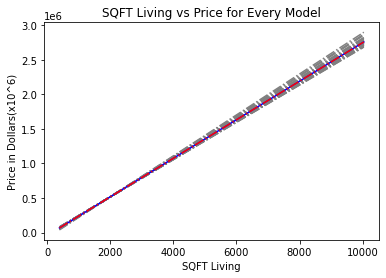

In [71]:
for i in range(model_points.shape[1]-4):
    plt.plot('X', 'model_'+str(i), data=model_points, color = 'grey', linestyle = '-.')
plt.plot('X', 'Bagged_Predictions', data=model_points, color = 'blue')
plt.plot('X', 'Mean_Predictions', data=model_points, color = 'red', linestyle = '-.')
plt.xlabel('SQFT Living')
plt.ylabel('Price in Dollars(x10^6)')
plt.title('SQFT Living vs Price for Every Model')
plt.show()

## Let's check how far the bagged model is from the direct model

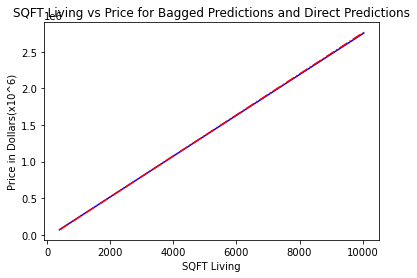

In [72]:
plt.plot('X', 'Bagged_Predictions', data=model_points, color = 'blue')
plt.plot('X', 'Direct_Predictions', data=model_points, color = 'red', linestyle = '-.')
plt.xlabel('SQFT Living')
plt.ylabel('Price in Dollars(x10^6)')
plt.title('SQFT Living vs Price for Bagged Predictions and Direct Predictions')
plt.show()

### If we increase the number of bagged samples, the resultant regression line would be the same as the line which we would have obtained by without bagging the model so bagging is not a good idea when we have stable model.